___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [76]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [ ]:
conda update scikit-learn

Solving environment: ...working... 

Updating scikit-learn is constricted by 

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda





anaconda -> requires scikit-learn==0.24.2=py39hf11a4ad_1

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\Users\Nanet\anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB
    conda-package-handling-2.2.0|   py39haa95532_0         287 KB
    conda-package-streaming-0.9.0|   py39haa95532_0          29 KB
    future-0.18.3              |   py39haa95532_0         704 KB
    pyjwt-2.4.0                |   py39haa95532_0          38 KB
    xmltodict-0.13.0           |   py39haa95532_0          19 KB
    zstandard-0.19.0           |   py39h2bbff1b_0         340 KB
    -------------------------------------

In [ ]:
conda update pandas

Solving environment: ...working... 

Updating pandas is constricted by 

anaconda -> requires pandas==1.3.4=py39h6214cd6_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




#### Load Dataset

In [4]:
# mounted with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#load the dataset
path = "/content/gdrive/MyDrive/Mall_Customers (1).csv"
df_cust = pd.read_csv(path)

In [6]:
df_cust.shape

(200, 5)

In [16]:
df_cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df_cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Rename column Annual Income (k$) ---> Annual_Income
# Rename column Spending Score (1-100) ---> Spending_Score
df_cust.rename(columns={'Annual Income (k$)': 'Annual_Income',
                            'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [8]:
df_cust.drop(columns=["CustomerID"], inplace=True)

In [19]:
df_cust.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Annual_Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Spending_Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_3, *['Age', 'Annual_Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['Annual_Income', 'Spending_Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['Annual_Income'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['Spending_Score'], **{})
chart

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





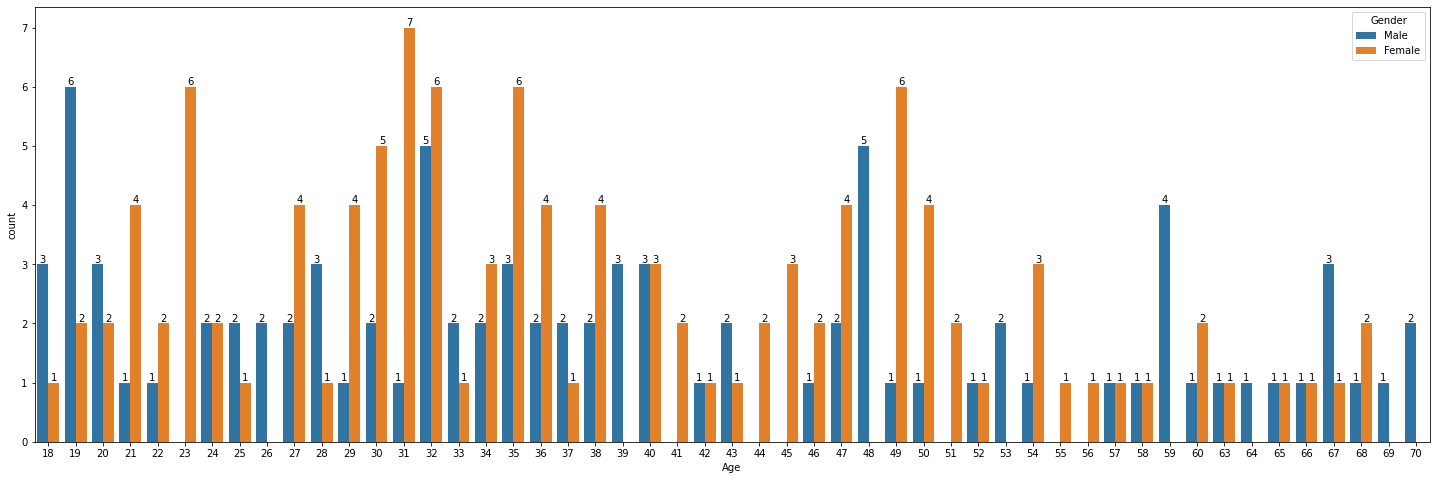

In [ ]:
# Bar charts below shows the frequency , range and distribution for all features
plt.figure(figsize=(25, 8))
ax = sns.countplot(x="Age", data = df_cust, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

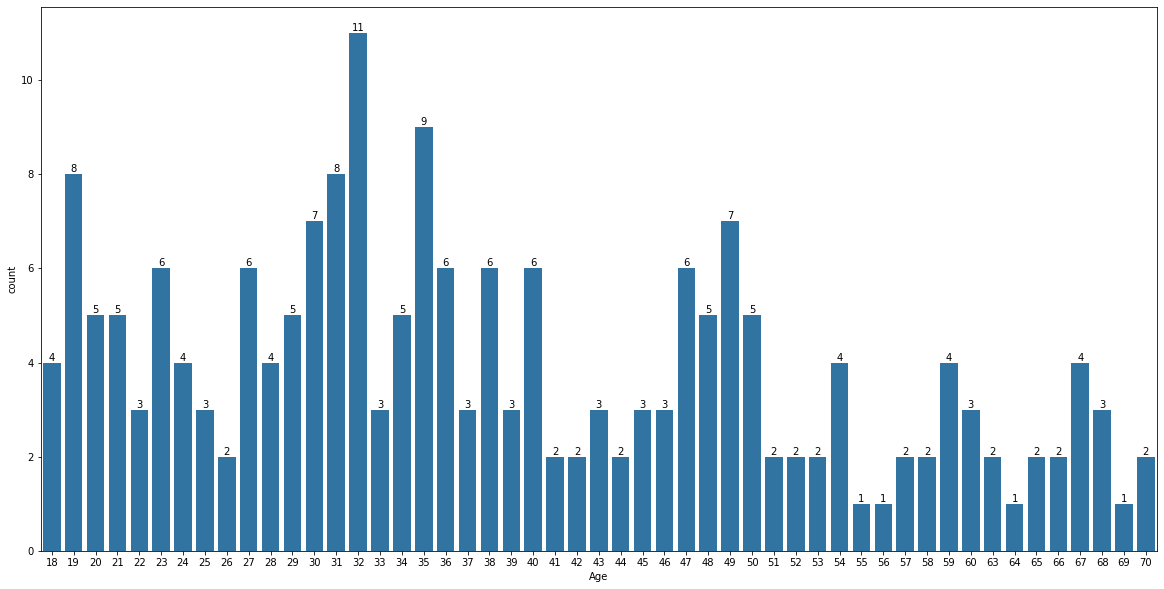

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x="Age", data = df_cust)
for p in ax.containers:
    ax.bar_label(p)

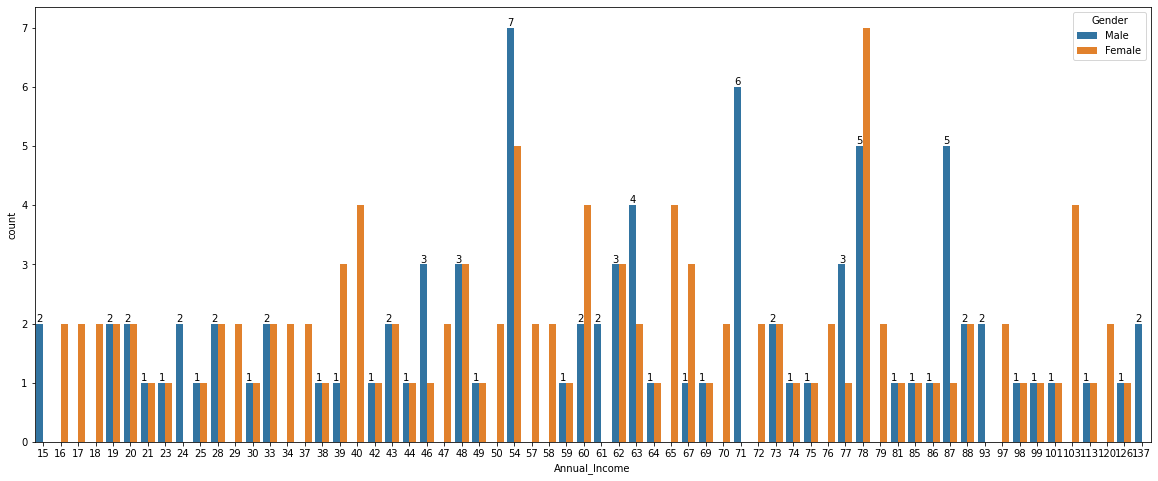

In [ ]:
plt.figure(figsize=(20, 8))# Set default figure size
ax = sns.countplot(x= "Annual_Income", data = df_cust , hue = "Gender")
ax.bar_label(ax.containers[0]);

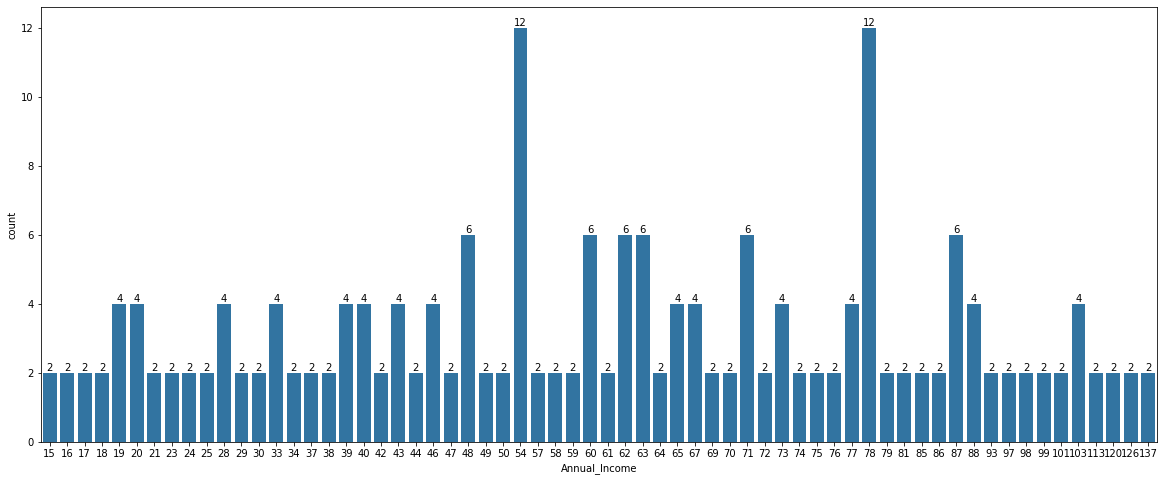

In [ ]:
plt.figure(figsize=(20, 8))# Set default figure size
ax = sns.countplot(x= "Annual_Income", data = df_cust )
ax.bar_label(ax.containers[0]);

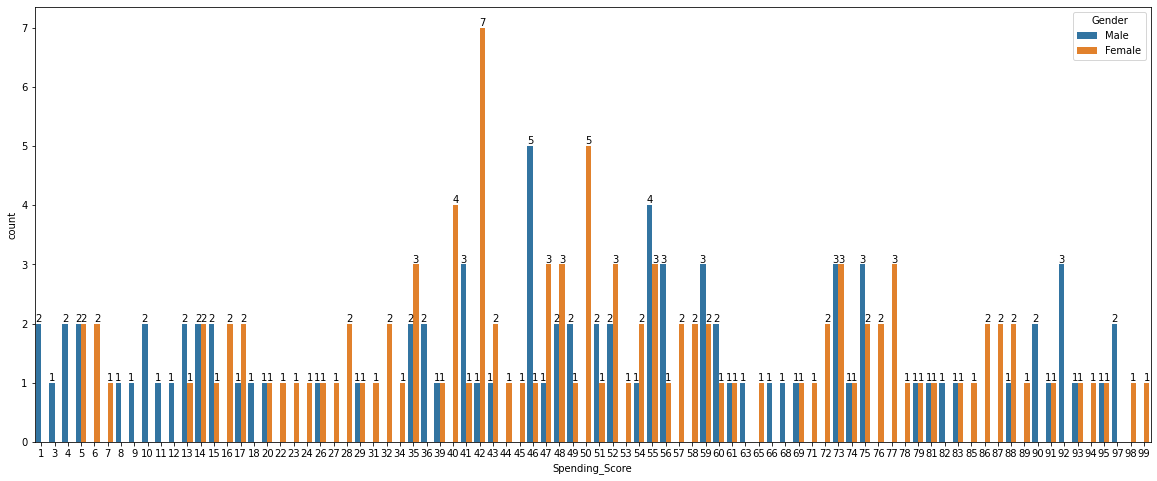

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Spending_Score", data = df_cust, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

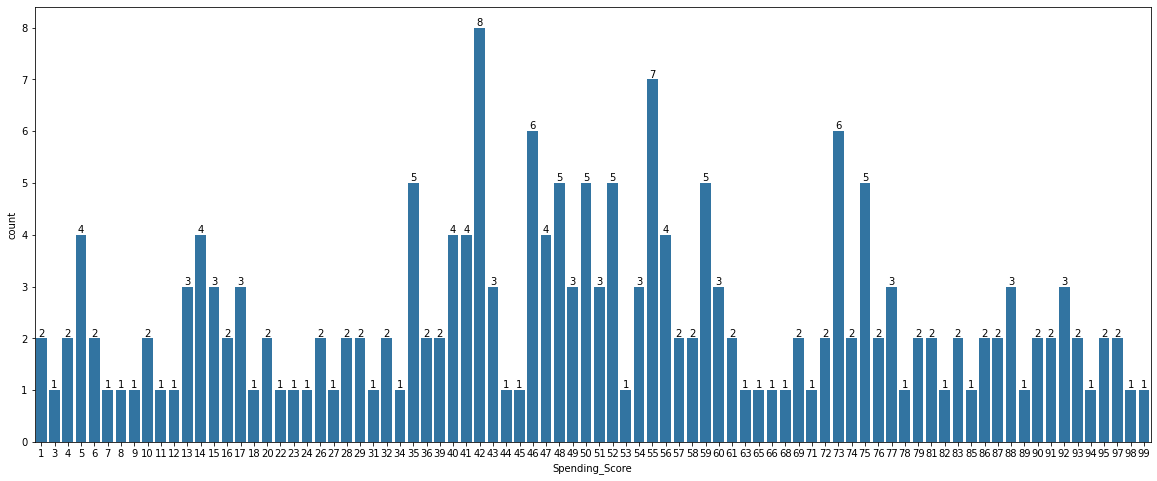

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Spending_Score", data = df_cust)
for p in ax.containers:
    ax.bar_label(p)

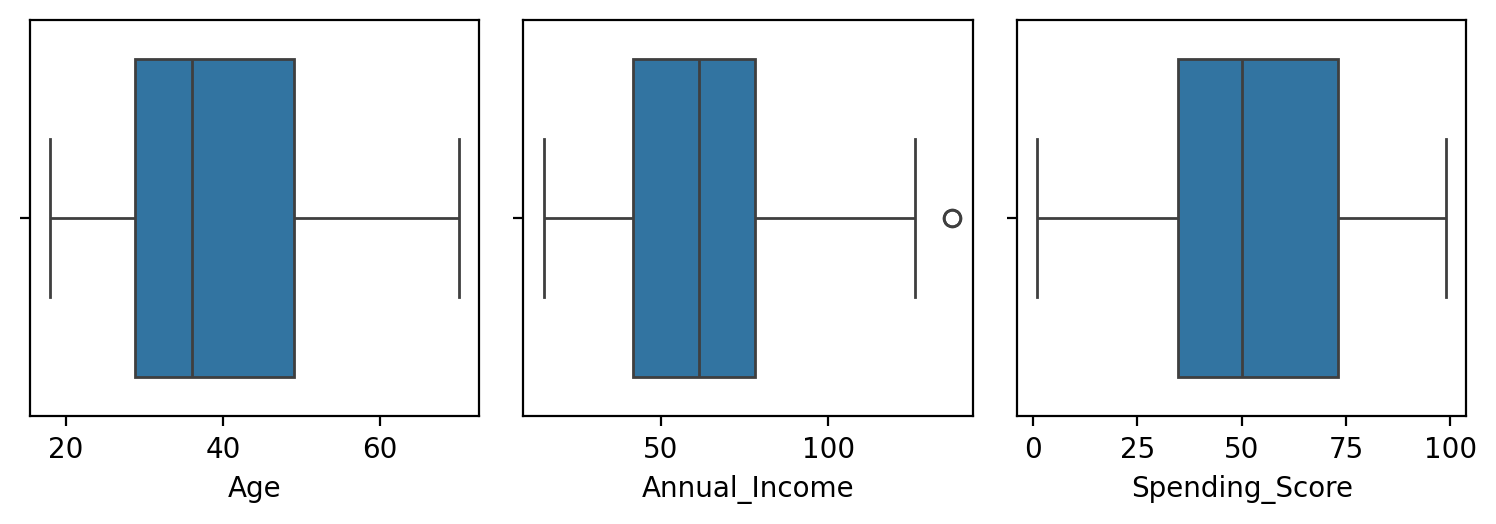

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df_cust.select_dtypes(["float", "int"]).columns):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x=df_cust[col])

plt.tight_layout();
#Box plots for the age , annual income and spending score
# enables us to figuring out the average of the date , outliers and min max values for each feauture
# as we can see there is no outlier except one in annual income 

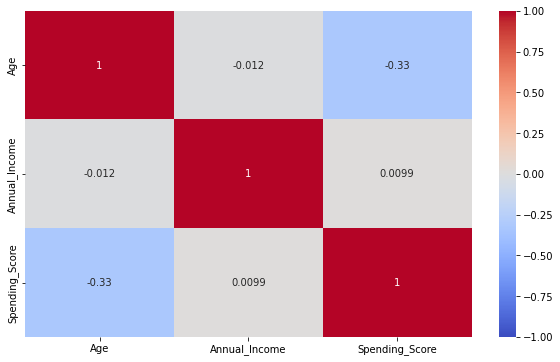

In [ ]:
sns.heatmap(df_cust.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm",annot=True);
# Below is Pie chart for the Gender it's show the percentage of the gender's values

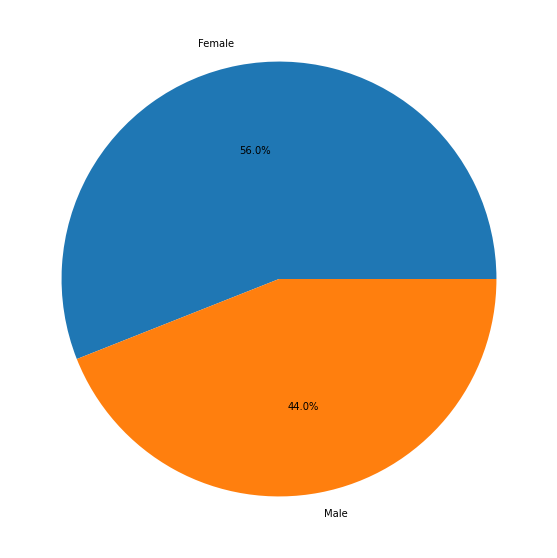

In [ ]:
df_cust["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.ylabel("");
# Below is Pie chart for the Gender it's show the percentage of the gender's values

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

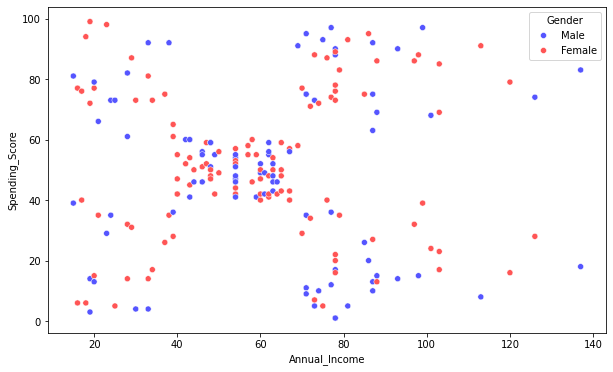

In [ ]:
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Gender', data=df_cust, palette='seismic')
# Scatter plot for annual income and spending score features
# the below visual demonstrate the distribution of the features
# the clusters are very obviouse 

<Figure size 288x432 with 0 Axes>

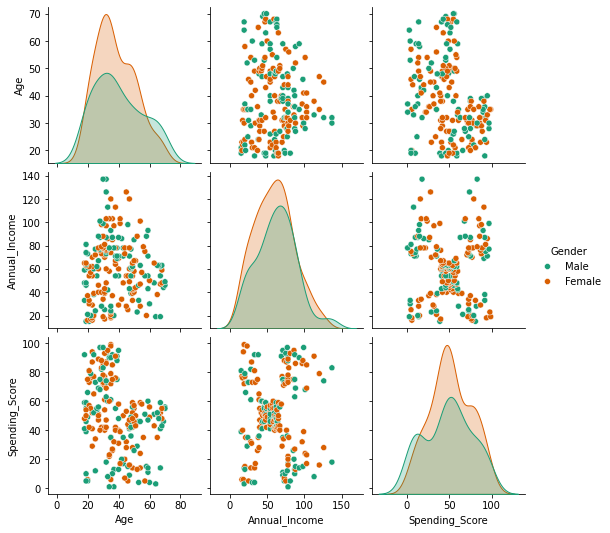

In [ ]:
plt.figure(figsize=(4,6))
sns.pairplot(df_cust,hue='Gender',palette='Dark2');
# Using pairplot we can figuring out our data shapes ,an if it's could be used for clustering

In [9]:
#deleting Gender column because it's categorical and clustering algorithm couldn't dealing with categorical data
df_customer = df_cust.drop(columns=["Gender"])
df_customer

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [85]:
# create new dataframe for clustering purpose
My_df = df_customer.loc[:,['Age','Spending_Score']]
My_df

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [11]:
My_df.shape

(200, 2)

In [54]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [23]:
#hopkins test that shows that if our dataset has prone to clustering or not
#since it above 0.5 then the data frame suitable for clustering
hopkins(My_df, 0.05)

0.7233022597224469

In [24]:
#here the hopkins test for whole dataset above 0.5 then the data suitable for clustering
hopkins(df_customer, 1)

0.674745960668485

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

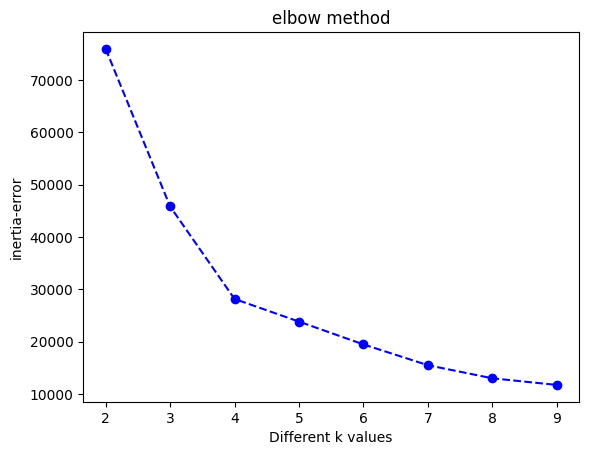

In [25]:
# Elbow method to determine the number of clusters that suitable for the data before implement the clustering
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(My_df)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("The Elbow Method")
#The  Elbow method told us the the optimal number for clusers are 4

# According to the above visuals 
# the elbow method using inertia and distortion loss function ,oth are suggested the same k value k=4

In [12]:
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(My_df)
    distances = kmeanModel.transform(My_df) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'The Elbow Method')

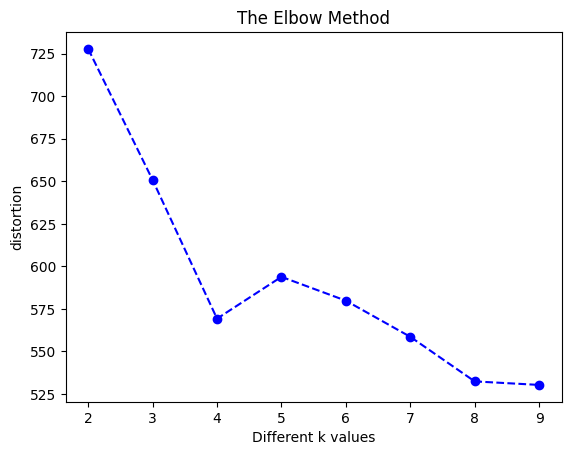

In [13]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("The Elbow Method")

In [15]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(My_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(My_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


**The silhouette_score of the numer of clusters = 4 is the highest score **

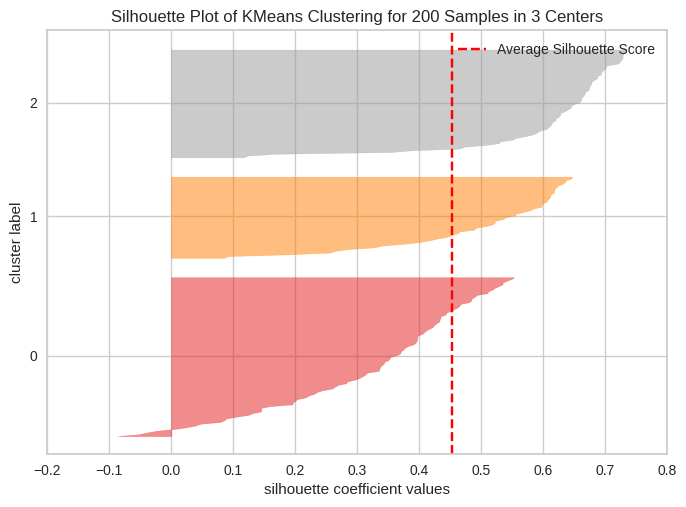

In [16]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(My_df)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

### Why silhouette_score is negative?

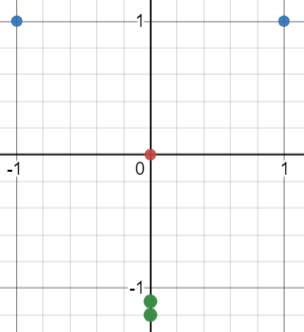

Because it's assigned to the wrong cluster

#### *iii. Apply K Means*

In [156]:
#Building Kmeans model with 4 clusters
kmeans_model = KMeans(n_clusters = 4, random_state=42)
kmeans_model.fit_predict(My_df)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [157]:
#Saving Kmeans model labels in clusters variable
# To create a new column for the clusters label in our dataframe
clusters = kmeans_model.labels_

In [158]:
# Our dataframe BEFORE adding the new column
km_df = My_df.copy() #make a copy of the original dataframe before adding the clustering labels column
km_df.head()
#My_df the original data frame for Age and Spending_Score
#km_df data frame for the k-means clustering for to add clustering labels column


,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [159]:
# Adding new column for the clusters and named it as "predicted_clusters"
km_df["Kmeans_clusters"] = clusters

In [161]:
# Our dataframe AFTER adding the new column
km_df.head()

,Age,Spending_Score,Kmeans_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


#### *iv. Visualizing and Labeling All the Clusters*

In [93]:
# coordinates of centorids:
centers = kmeans_model.cluster_centers_
centers

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

In [94]:
centers[:,0]

array([55.70833333, 43.29166667, 30.1754386 , 27.61702128])

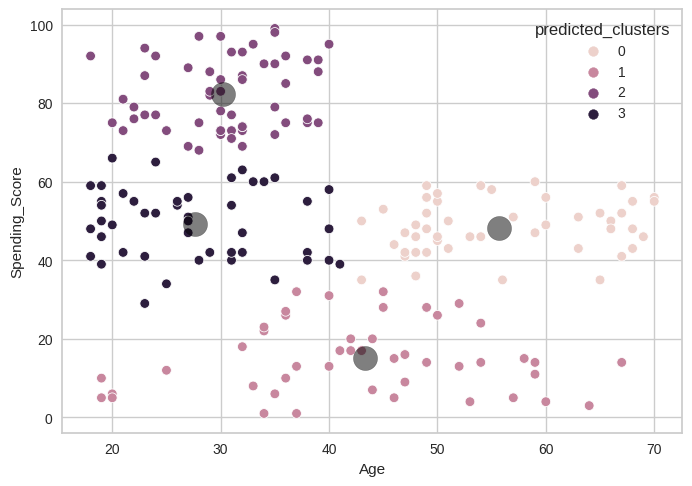

In [96]:
# Visualizing the clusters and the centroids
sns.scatterplot(x="Age",
            y="Spending_Score",
            data =km_df,
            #palette="pastel",
            hue="predicted_clusters")

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

AS we can see from the above scatterplot the mall customers has diffirent behavior of spending score for All ages

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [51]:
df_customer.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [97]:
My_df2 = df_customer.loc[:,['Annual_Income','Spending_Score']]
My_df2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [98]:
# the dataframe that consist of the two features ['Annual_Income','Spending_Score']
# has prone to clustering
hopkins(My_df2, 1)

0.7061340378097906

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'The Elbow Method')

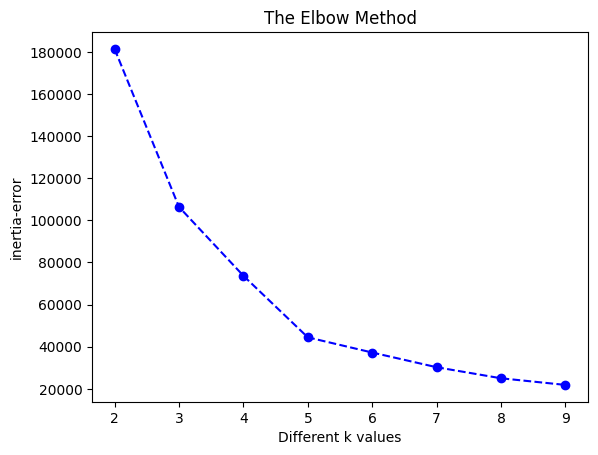

In [56]:
# The Elbow Method to determining the optimal number of clusters using inertia loss function
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(My_df2)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("The Elbow Method")

**According the Elbow Method curve using inertia loss function above , the optimal number of clusters for the k-means dataframe (km_df2) is k = 5 **

In [60]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(My_df2)
    distances = kmeanModel.transform(My_df2) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'The Elbow Method')

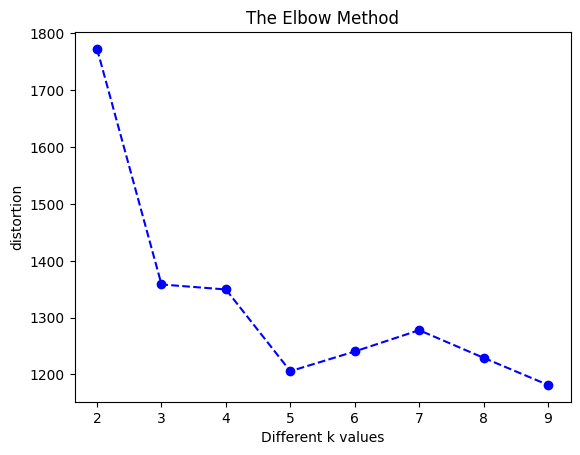

In [61]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("The Elbow Method")

**According the Elbow Method curve using distortion loss function above ,the optimal number of clusters for the k-means dataframe is k = 5 **
lets see the silhouette score recommendation for optimal k by doing Silhouette analysis.


In [59]:
# Silhouette  Analysis
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(My_df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(My_df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


**The silhouette_score of the numer of clusters = 5 is 0.55 and it's the highest score recommended  **
Therefore

**THE FINAL NUMBER OF CLUSTERS = 5**

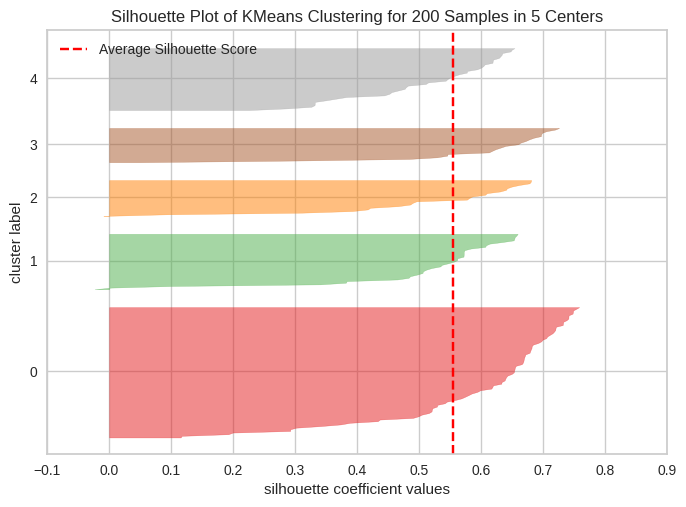

In [63]:
# Silhouette Visualization
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5,random_state=42)  # we decided n_clusters=5!
visualizer = SilhouetteVisualizer(model)

visualizer.fit(My_df2) # Fit the data to the visualizer
visualizer.poof();



# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### *iii. Apply K Means*

In [166]:
#Building Kmeans model with 5 clusters
kmeans_model2 = KMeans(n_clusters = 5, random_state=42)
kmeans_model2.fit_predict(My_df2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [167]:
#Saving Kmeans model labels in clusters variable
# To create a new column for the clusters label in our dataframe
clusters2 = kmeans_model2.labels_

In [168]:
# Our dataframe BEFORE adding the new column
km_df2 = My_df2.copy()#make a copy of the original dataframe before adding the clustering labels column
km_df2.head()
#My_df2 the original data frame for Annual_Income	and Spending_Score
#km_df2 data frame for the k-means clustering to add clustering labels column


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [169]:
# Adding new column for the clusters and named it as "predicted_clusters"
km_df2["kmeans__clusters"] = clusters2

In [170]:
# Our dataframe AFTER adding the new column
km_df2.head()

,Annual_Income,Spending_Score,kmeans__clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


#### *iv. Visualizing and Labeling All the Clusters*

In [107]:
# coordinates of centorids:
centers2 = kmeans_model2.cluster_centers_
centers2

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

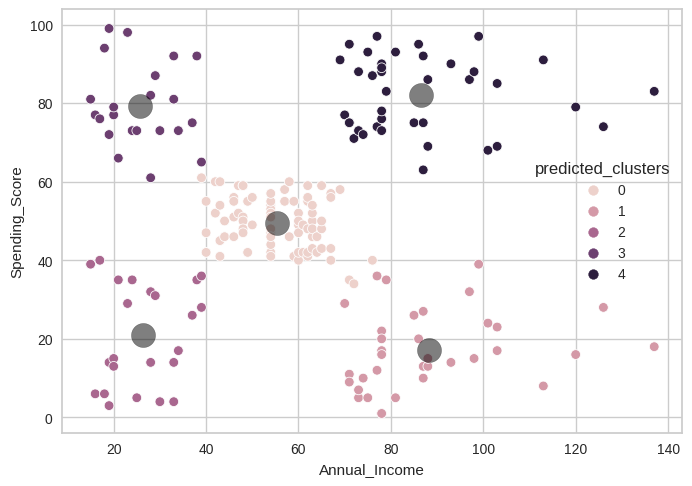

In [108]:
# Visualizing the clusters and the centroids
sns.scatterplot(x="Annual_Income",
            y="Spending_Score",
            data =km_df2,
            #palette="pastel",
            hue="predicted_clusters")

plt.scatter(centers2[:, 0],
            centers2[:, 1],
            c='black',
            s=300,
            alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [109]:
My_df.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [172]:
#Copy of the data frame
HC = My_df.copy()

In [111]:
# Hopkins Test , above 0,5 means it's excellent for clustering
hopkins(HC, 1)

0.6702222602378529

In [121]:
#Linkage Methods
hc_ward = linkage(y=HC, method="ward")# Ward Linkage
hc_complete = linkage(HC, "complete")#Complete Linkage
hc_average = linkage(HC, "average")#Average Linkage
hc_single = linkage(HC, "single")#Sinsle Linkage

# Defining the linkage methods to be used in the dendogram.

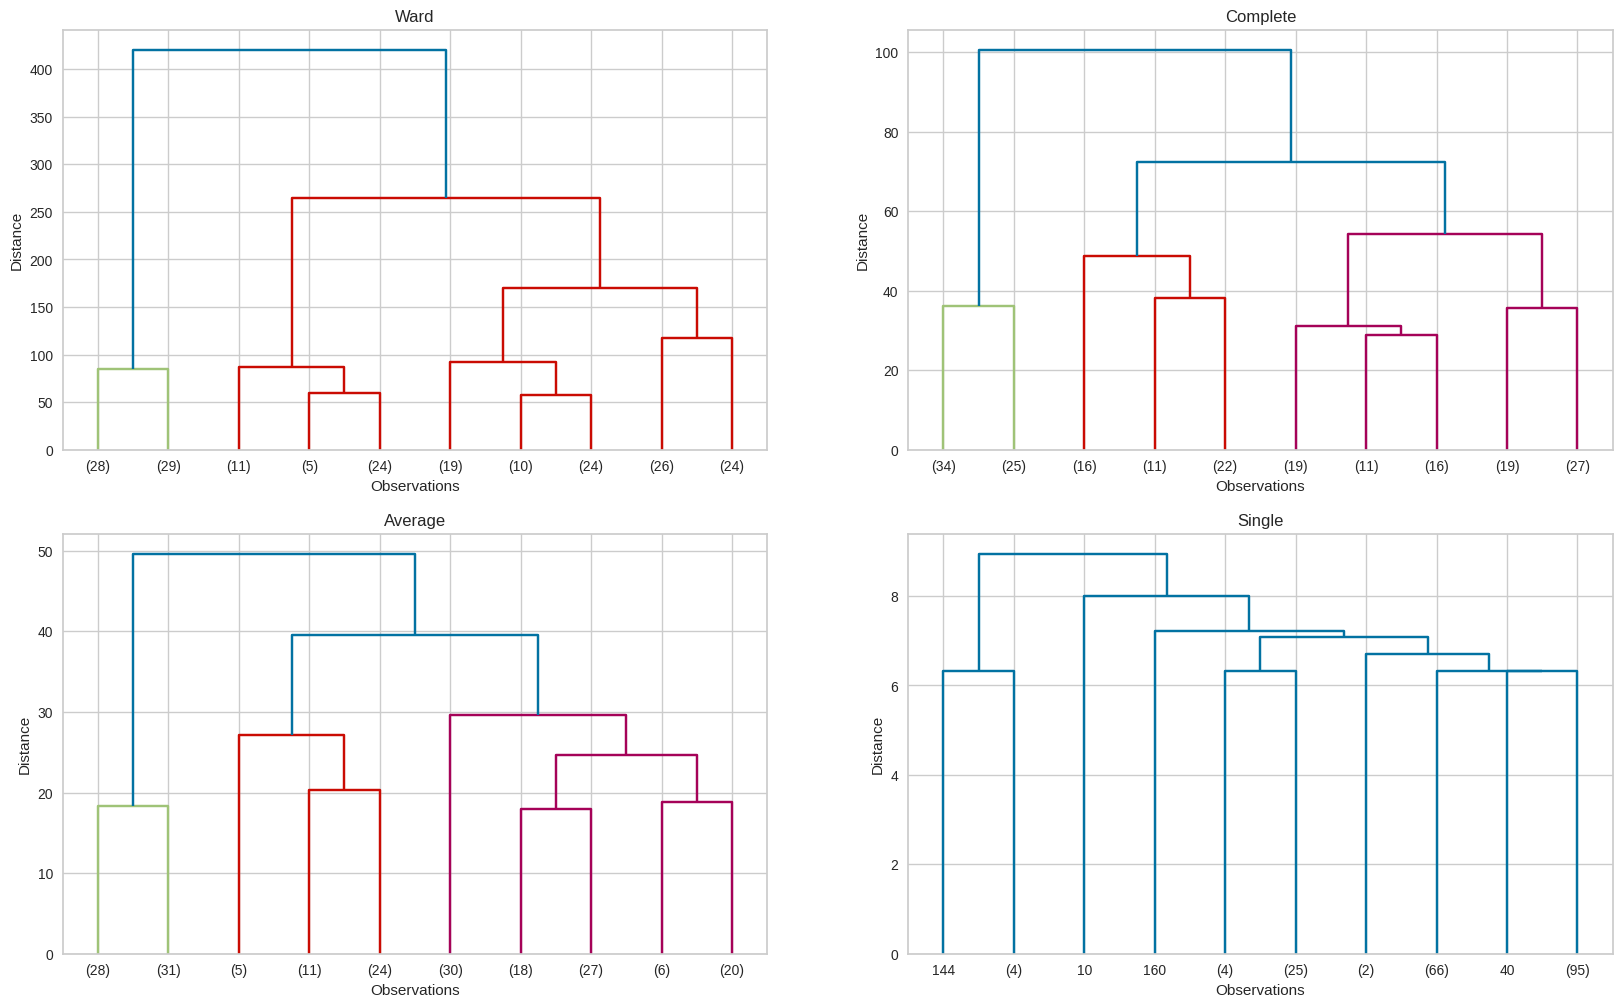

In [122]:
#Dendogram using the different linkage methods
# To find the optimal number odf clusters
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10,truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10 ,truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10 ,truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10 ,truncate_mode='lastp', p=10);



*   Ward Linkage suggests the number of clusters = 2
*   Complete Linkage suggests the number of clusters = 3
*   Average Linkage suggests the number of clusters = 3
*   Single Linkage suggests the number of clusters = 10

But we will see what a sillhoute scores and scatterplot recommended the Num of clusters




In [116]:
# Silhouette  Analysis
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_Model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_Model.fit(HC)
    cluster_labels = Agg_Model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(HC, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531


**The silhouette_score of the numer of clusters = 4 is 0.46 and it's the highest score recommended  **


<Axes: xlabel='Age', ylabel='Spending_Score'>

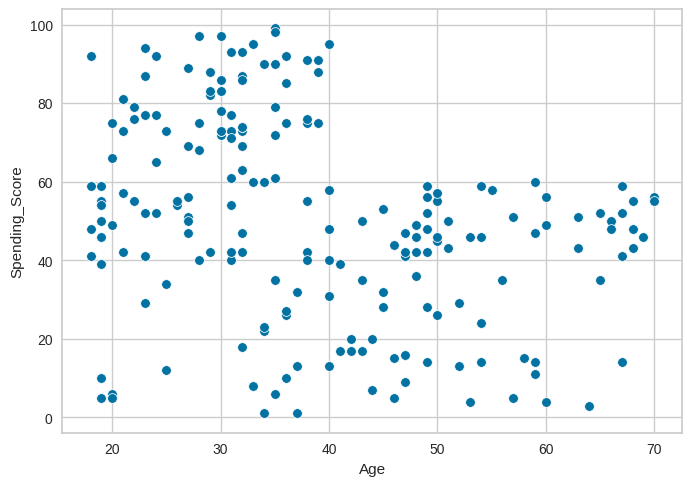

In [120]:
sns.scatterplot(x="Age",
            y="Spending_Score",
            data =HC,
            #palette="pastel",
            )

Therefore based on the silhouette scores and scatterplot because it has the highest score in silhouette analysis

**THE FINAL NUMBER OF CLUSTERS = 4**

## Clustering based on Annual Income and Spending Score- x2

In [123]:
My_df2.head()


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [171]:
#Copy of the data frame
HC2 = My_df2.copy()

In [125]:
# Hopkins Test , above 0,5 means it's excellent for clustering
hopkins(HC2, 1)

0.7134310004235178

In [127]:
#Linkage Methods
hc2_ward = linkage(y=HC2, method="ward")# Ward Linkage
hc2_complete = linkage(HC2, "complete")#Complete Linkage
hc2_average = linkage(HC2, "average")#Average Linkage
hc2_single = linkage(HC2, "single")#Sinsle Linkage

# Defining the linkage methods to be used in the dendogram.

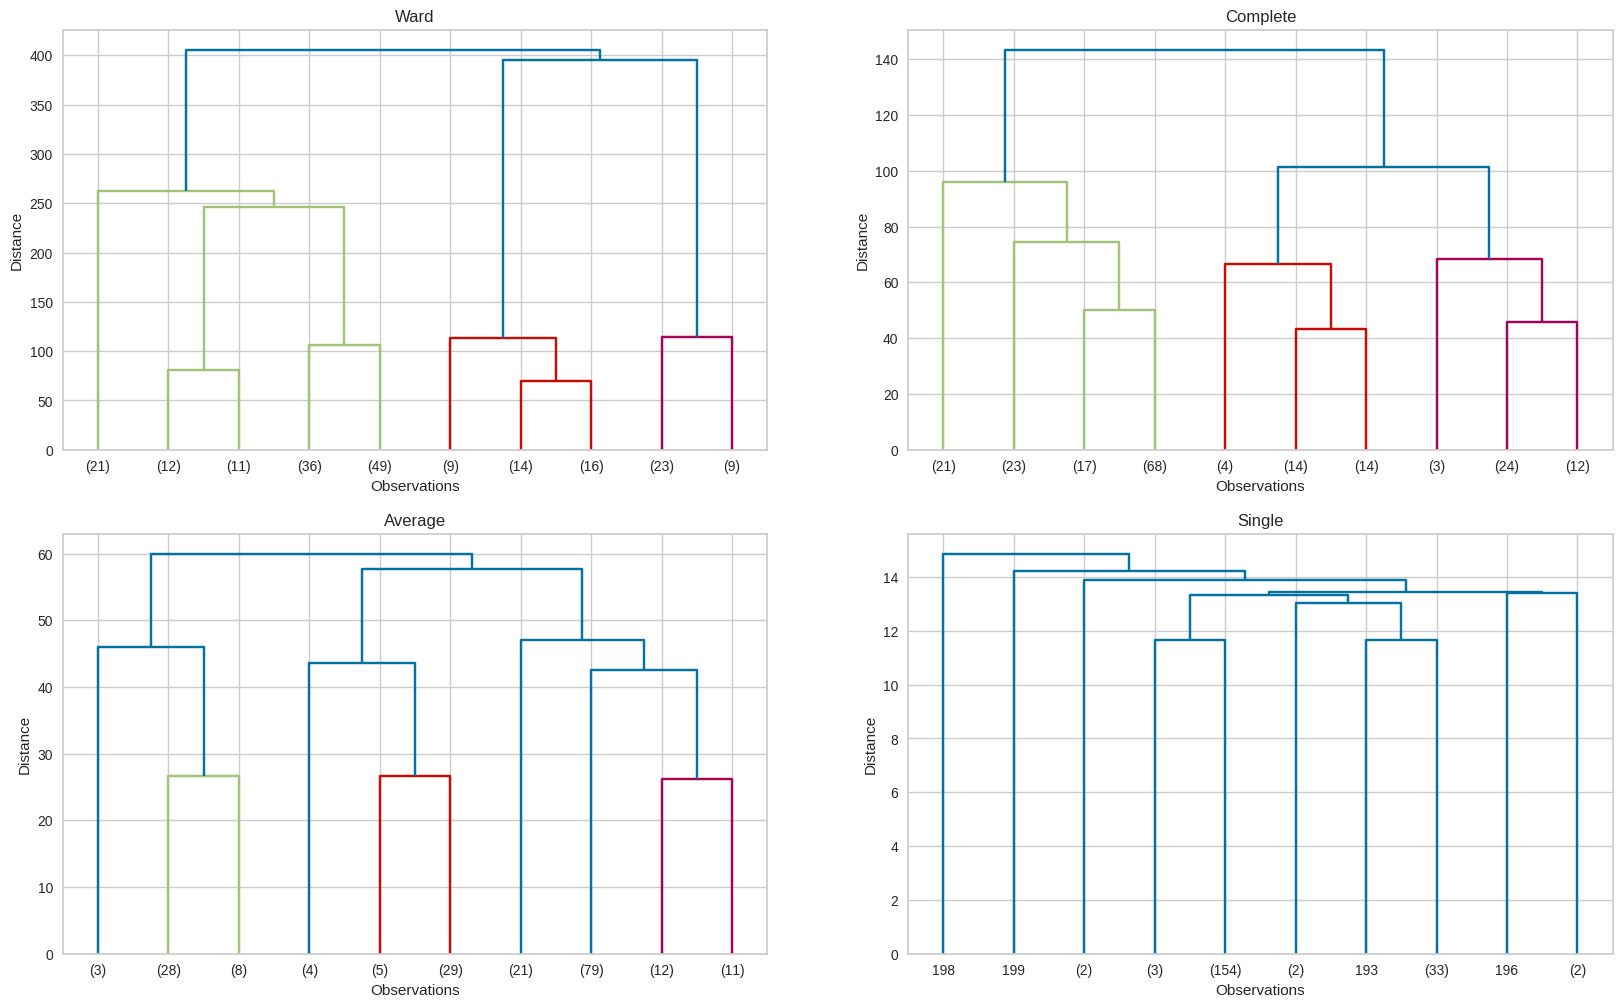

In [128]:
#Dendogram using the different linkage methods
# To find the optimal number odf clusters
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc2_ward, leaf_font_size = 10,truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc2_complete, leaf_font_size = 10 ,truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc2_average, leaf_font_size = 10 ,truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc2_single, leaf_font_size = 10 ,truncate_mode='lastp', p=10);

*   Ward Linkage suggests the number of clusters = 3
*   Complete Linkage suggests the number of clusters = 2
*   Average Linkage suggests the number of clusters = 7
*   Single Linkage suggests the number of clusters = 10

But we will see what a sillhoute scores and scatterplot recommended the Num of clusters




In [129]:
# Silhouette  Analysis
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_Model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_Model.fit(HC2)
    cluster_labels = Agg_Model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(HC, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.12564898127886656
For n_clusters=3, the silhouette score is 0.1763037085315914
For n_clusters=4, the silhouette score is 0.1722707063503673
For n_clusters=5, the silhouette score is 0.16147962304006064
For n_clusters=6, the silhouette score is 0.10287007384891328
For n_clusters=7, the silhouette score is 0.04601538432255534
For n_clusters=8, the silhouette score is -0.0437148130766567


**The silhouette_score of the numer of clusters = 3 is 0.176 and it's the highest score recommended  **

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

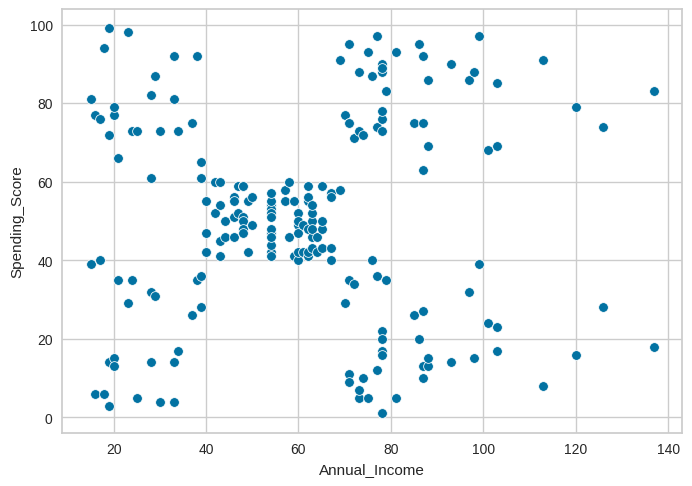

In [130]:
sns.scatterplot(x="Annual_Income",
            y="Spending_Score",
            data =HC2,
            #palette="pastel",
            )

Therefore based on the silhouette scores and scatterplot,because the scatterplot demonstrates the clusters clearly and it has the high score in silhouette analysis

**THE FINAL NUMBER OF CLUSTERS = 5**

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [181]:
#Building Agglomerative hierarechal clustering
Agg_model = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
Agg_model.fit_predict(HC)
# We run the model with default values.

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [184]:
clusters3 = Agg_model.labels_

In [173]:
km_df.head()

,Age,Spending_Score,Kmeans_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


In [185]:
km_df['cluster_Agg'] = clusters3
km_df.head()

,Age,Spending_Score,Kmeans_clusters,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [186]:
#Building Agglomerative hierarechal clustering
Agg_model2 = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
Agg_model2.fit_predict(HC2)
# We run the model with default values.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [187]:
clusters4 = Agg_model2.labels_

In [177]:
km_df2.head()

,Annual_Income,Spending_Score,kmeans__clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [188]:
km_df2['cluster_Agg'] = clusters4
km_df2.head()

,Annual_Income,Spending_Score,kmeans__clusters,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending_Score'>

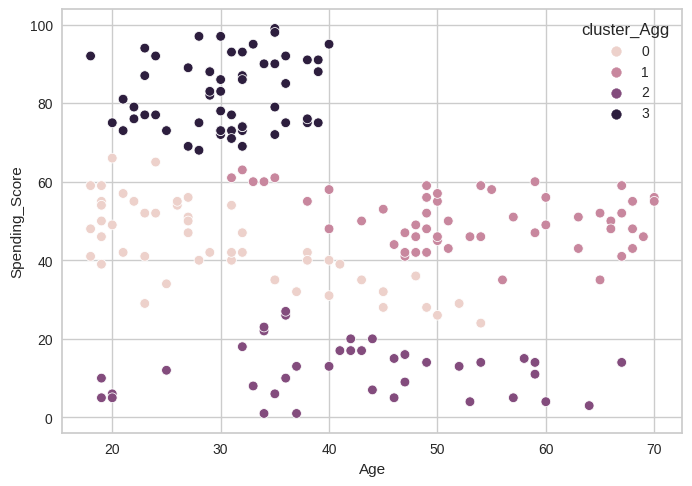

In [189]:

sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=km_df)

#### Annual Income and Spending Score- x2

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

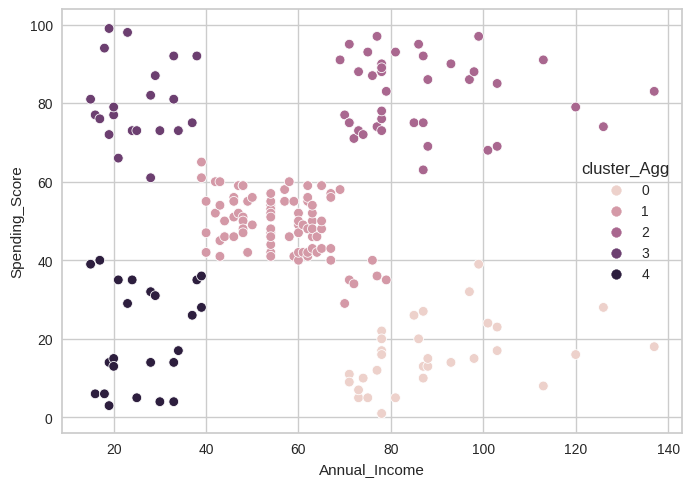

In [190]:
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=km_df2)

#### Interpretation based on Age and Spending Score- x1

### Conclusion




*   **Cluster 4:** The customers with Age range [15,40] has the highest spending scores,so it's GOLD CUSTOMERS . And that's make sence due to teenagers love shopping.
*   **Cluster 0:** these are customers has age range [15,55] and mideum spending scores mso they must focused on them, because most of them are teenagers ,and they could become gold customers.
*   **Cluster 1:** customers above 30s with medium spending scores[40,60] , they need careness and providing some goods and dicounts to attract them .
*   **Cluster 2:** customers with lowest spending scores from all ages.




#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion



* **Cluster 0:** customers with annual income above 70 which has low spending scores, they could be gold customers because they has high income , maybe they need special goods and beatuiful place to attract them.
*  **Cluster 1:** customers with medium annual income and spending scores, they also need more attention due to likelihood to be gold customers .
*   **Cluster 2:** customers with the highest annual income and high spending scores, they are GOLD CUSTOMERS.
*   **Cluster 3:** these are also customers with the highest spending scores, and low annual income they are GOLD CUSTOMERS , they deserve ponus points to avoid lost them .
*   **Cluster 4:** the customers with annual income below 40s and soending scores also below 40s , therefore they need special discounts.








___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___